In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
correlation = gold_data.corr()

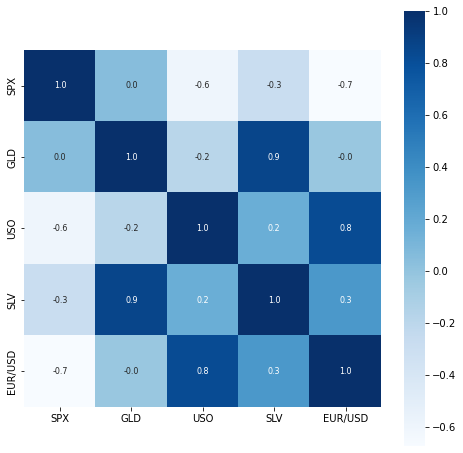

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap ='Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


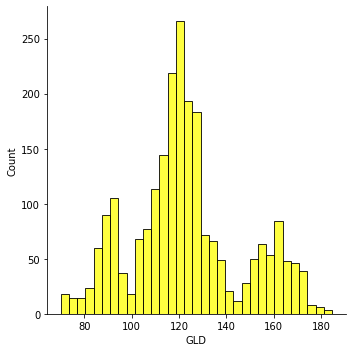

In [11]:
sns.displot(gold_data['GLD'],color='yellow')

In [13]:
X = gold_data.drop(['Date','GLD'],axis =1)
Y = gold_data['GLD']

In [14]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state=2)

In [20]:
Regressor = RandomForestRegressor(n_estimators=100)

In [21]:
Regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [25]:
test_data_prediction = Regressor.predict(X_test)

In [26]:
print(test_data_prediction)

[168.55689957  81.8828999  115.71940034 127.71410105 120.78690148
 154.72219739 150.30499799 126.05700034 117.44639877 126.00070099
 116.6036013  171.68700089 141.87009892 167.85289867 115.13690017
 117.72790041 137.8185029  170.53030186 159.79910328 155.64759954
 155.03750007 125.36840042 175.4473997  157.41200364 125.18830038
  93.94179968  77.56550014 120.40219986 119.11759944 167.51159968
  88.25940049 125.24800031  91.2186008  117.70730012 121.06289974
 136.7560012  115.528801   115.63600065 147.53029951 107.4242006
 103.87790218  87.26819812 126.59100043 117.6269999  153.30679955
 119.77779967 108.4041998  108.44699796  93.32000014 126.88099837
  74.51930066 113.54469907 121.24050036 111.47169872 118.84689897
 120.40219936 159.16729914 170.73260087 146.97939679  86.26419904
  94.51560013  86.86939914  90.46300001 119.0266007  126.47050047
 127.51079975 168.41839962 122.11979926 117.21249898  98.39010036
 167.80510133 142.93139837 131.67550289 121.13540236 121.04099936
 119.604300

In [29]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared value is:', error_score)

R squared value is: 0.9881544676993286


In [30]:
Y_test = list(Y_test)

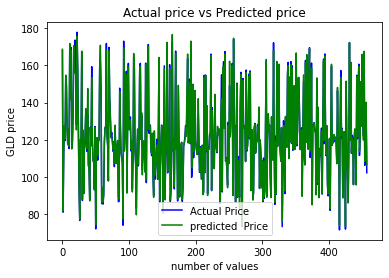

In [32]:
plt.plot(Y_test,color ='Blue',label='Actual Price')
plt.plot(test_data_prediction,color ='green',label='predicted  Price')
plt.title('Actual price vs Predicted price')
plt.xlabel("number of values")
plt.ylabel("GLD price")
plt.legend()
plt.show()


